In [1]:
import numpy as np
import vaex as vx
import pylab
ds = vx.open("data/Aq-A-2-999-shuffled-10percent.hdf5")
%matplotlib inline

DEBUG:vaex:trying 'data/Aq-A-2-999-shuffled-10percent.hdf5' with class <class 'vaex.dataset.Zeldovich'>
DEBUG:vaex:trying 'data/Aq-A-2-999-shuffled-10percent.hdf5' with class <class 'vaex.dataset.AmuseHdf5MemoryMapped'>
DEBUG:vaex:trying 'data/Aq-A-2-999-shuffled-10percent.hdf5' with class <class 'vaex.dataset.Hdf5MemoryMappedGadget'>
DEBUG:vaex:try particle type
INFO:vaex:cannot open data/Aq-A-2-999-shuffled-10percent.hdf5 as <class 'vaex.dataset.Hdf5MemoryMappedGadget'>
DEBUG:vaex:trying 'data/Aq-A-2-999-shuffled-10percent.hdf5' with class <class 'vaex.dataset.Hdf5MemoryMapped'>
DEBUG:vaex:can open!


Simplest example
=========
The default for plot is to calculate the mean +/- 3 sigma for the limits, and plot the density plot

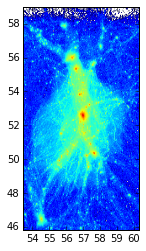

In [2]:
expr = ds("x", "y")
expr.plot(f=np.log)

More control
============
For more control, you can find the limits yourself, with minmax or limits_sigma, do the histogram, and let vaex handle the plotting.

Vaex uses matplotlib, so any matplotlib routines before and afterwards are fine.

In [3]:
limits = expr.limits_sigma(square=True, sigmas=0.4)
means = expr.mean()
print "limits", limits

limits [(56.197182192798408, 57.533051200716386), (51.749194507801121, 53.085063515719099)]


In [4]:
grid = expr.histogram(size=256, limits=limits)

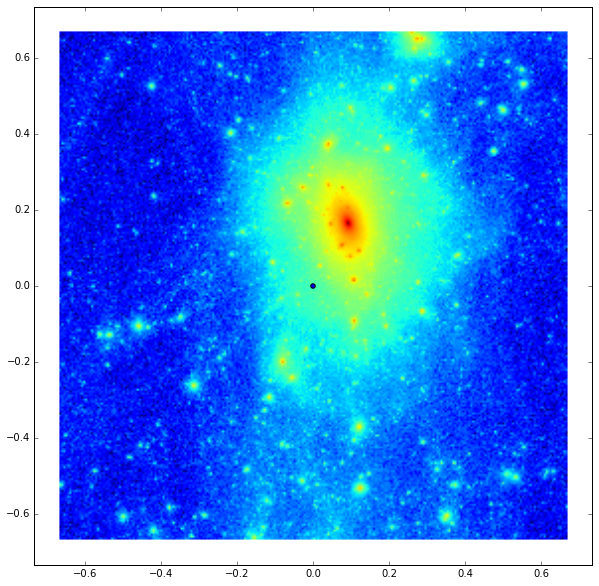

In [25]:
pylab.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
expr.plot(np.log10(grid+1), limits, center=means)
pylab.scatter(0, 0)

More control
======
Extra keywords will be passed to pylab.imshow, such as cmap for the colormap

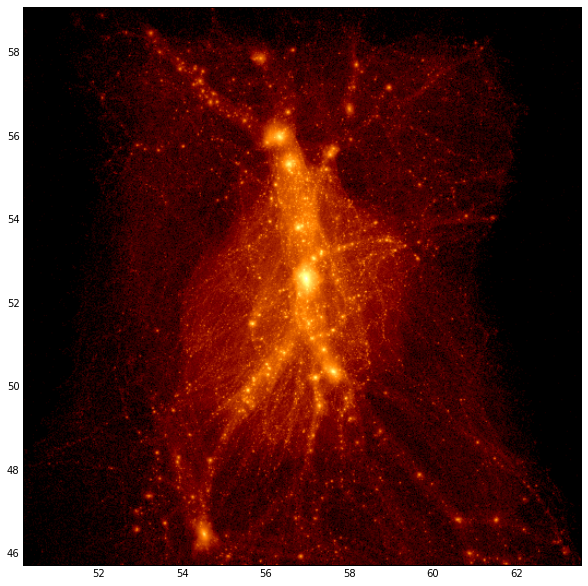

In [7]:
limits = expr.limits_sigma(sigmas=4, square=True)
grid = expr.histogram(size=512, limits=limits)
pylab.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
expr.plot(grid, limits=limits, f=np.log1p, cmap='afmhot')

In [8]:
%reload_ext autoreload
#%load_ext autoreload
%autoreload 2


Selections
==========
Selections can be done using expressions as well. To use the selection, use expr.masked()

In [43]:
ds.select_expression("(z<48)")
masked = expr.masked()
grid_masked1 = masked.histogram(size=512, limits=limits)
ds.select_expression("(z>50)")
grid_masked2 = masked.histogram(size=512, limits=limits)


Setting mask
Setting mask


<matplotlib.contour.QuadContourSet instance at 0x20fa8e248>

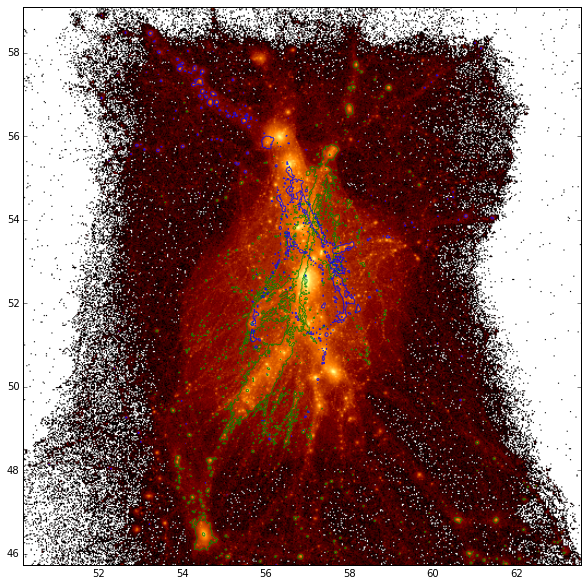

In [44]:
cmap = 'afmhot'
pylab.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
expr.plot(np.log(grid), limits=limits, cmap=cmap, alpha=1.0)
#expr.plot(np.log(grid_masked), limits=limits, cmap=cmap, alpha=0.5)
pylab.contour(np.log(grid_masked1), 2, extent=np.array(limits).flatten(), alpha=0.8, colors="green")
pylab.contour(np.log(grid_masked2), 2, linewidth="2pt", colors="blue", extent=np.array(limits).flatten(), alpha=0.8)

In [6]:
%aimport vaex
%aimport vaex.dataset


ERROR: Line magic function `%aimport` not found.
ERROR: Line magic function `%aimport` not found.
